# GROMACS 1400k-atom benchmark performance

This notebook compares the performance of the 1400k-atom GROMACS benchmark across different HPC systems.

Performance is measured in ns/day.

## Setup section

Import the required modules and define basic functions for reading the data from GROMACS output files and analysing it.

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from appanalysis import gromacs

## Setup results files

In [4]:
archercpn = 24
archerfiles = {1:'../1400k-atoms/results/ARCHER/benchmark_1nodes_201808060910.log',
               2:'../1400k-atoms/results/ARCHER/benchmark_2nodes_201808060942.log',
               4:'../1400k-atoms/results/ARCHER/benchmark_4nodes_201808061035.log',
               8:'../1400k-atoms/results/ARCHER/benchmark_8nodes_201808071540.log'
              }

In [5]:
cirruscpn = 36
cirrusfiles = {1:'../1400k-atoms/results/Cirrus/benchmark_1nodes_201808052010.log',
               2:'../1400k-atoms/results/Cirrus/benchmark_2nodes_201808060911.log'
               }

In [6]:
csd3scpn = 32
csd3sfiles = {1:'../1400k-atoms/results/CSD3-Skylake/benchmark_1nodes_201808060933.log',
              2:'../1400k-atoms/results/CSD3-Skylake/benchmark_2nodes_201808061001.log',
              4:'../1400k-atoms/results/CSD3-Skylake/benchmark_4nodes_201808061126.log'
             }

In [7]:
tesscpn = 24
tessfiles = {1:'../1400k-atoms/results/Tesseract/benchmark_1nodes_201808061330.log',
             2:'../1400k-atoms/results/Tesseract/benchmark_2nodes_201808061409.log'
             }

In [8]:
csd3gcpg = 3
csd3gfiles = {1:'../1400k-atoms/results/CSD3-GPU/benchmark_3core1gpu_201808061557.log',
              2:'../1400k-atoms/results/CSD3-GPU/benchmark_6core2gpu_201808071113.log',
              4:'../1400k-atoms/results/CSD3-GPU/benchmark_12core4gpu_201808071403.log'
             }

## Process data

In [9]:
archernodes, archerperf, archersu = gromacs.calcperf(archerfiles, archercpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              24           1.024            1.00
              2              48           2.090            2.04
              4              96           4.142            4.04
              8             192           7.869            7.68


In [10]:
cirrusnodes, cirrusperf, cirrussu = gromacs.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              36           1.377            1.00
              2              72           2.691            1.95


In [11]:
csd3snodes, csd3sperf, csd3ssu = gromacs.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              32           2.005            1.00
              2              64           3.414            1.70
              4             128           5.713            2.85


In [12]:
tessnodes, tessperf, tesssu = gromacs.calcperf(tessfiles, tesscpn)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1              24           1.187            1.00
              2              48           2.326            1.96


In [14]:
csd3gnodes, csd3gperf, csd3gsu = gromacs.calcperf(csd3gfiles, csd3gcpg)

          Nodes           Cores   Perf (ns/day)         Speedup
          =====           =====   =============         =======
              1               3           0.947            1.00
              2               6           1.648            1.74
              4              12           2.420            2.56


## Performance comparison

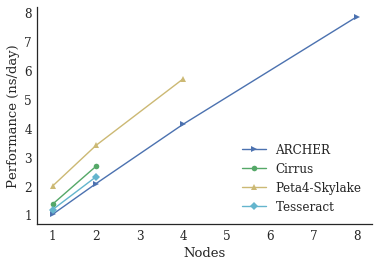

In [15]:
plt.plot(archernodes, archerperf, '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(csd3snodes, csd3sperf, '^-', color=cols[4], label='Peta4-Skylake')
plt.plot(tessnodes, tessperf, 'D-', color=cols[5], label='Tesseract')
plt.xlabel('Nodes')
plt.ylabel('Performance (ns/day)')
plt.legend(loc='best')
sns.despine()

## Performance comparisons

### Single Node

JADE ressults from HEC BioSim. For full details see: http://www.hecbiosim.ac.uk/jade-benchmarks

In [20]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archerperf[0]
cperf['ARCHER'] = archerperf[0]/archercpn
nperf['Cirrus'] = cirrusperf[0]
cperf['Cirrus'] = cirrusperf[0]/cirruscpn
nperf['Peta4-Skylake'] = csd3sperf[0]
cperf['Peta4-Skylake'] = csd3sperf[0]/csd3scpn
nperf['Tesseract'] = tessperf[0]
cperf['Tesseract'] = tessperf[0]/tesscpn
nperf['Wilkes2 GPU (3 core, 1 GPU)'] = csd3gperf[0]
nperf['Wilkes2 GPU (6 core, 2 GPU)'] = csd3gperf[1]
nperf['Wilkes2 GPU (12 core, 4 GPU)'] = csd3gperf[2]

print("Performance improvement relative to ARCHER:\n")
print("{:>30s} {:>15s} {:>15s}".format('System', 'Perf (ns/day)', 'Improvement'))
print("{:>30s} {:>15s} {:>15s}".format('======', '=============', '==========='))
print("Single node")
for system in nperf:
    print("{:>30s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf[system]/nperf['ARCHER']))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (5 core, 1 GPU)", 1.647, 1.647/nperf['ARCHER'], "http://www.hecbiosim.ac.uk/jade-benchmarks"))
print("{:>30s} {:>15.3f} {:>15.3f} {:>45s}".format("JADE (20 core, 4 GPU)", 1.469, 1.496/nperf['ARCHER'], "http://www.hecbiosim.ac.uk/jade-benchmarks"))

print("\n")

print("per-core")
for system in cperf:
    print("{:>20s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf[system]/cperf['ARCHER']))

Performance improvement relative to ARCHER:

                        System   Perf (ns/day)     Improvement
                        ======   =============     ===========
Single node
                        ARCHER           1.024           1.000
                        Cirrus           1.377           1.345
                 Peta4-Skylake           2.005           1.958
                     Tesseract           1.187           1.159
   Wilkes2 GPU (3 core, 1 GPU)           0.947           0.925
   Wilkes2 GPU (6 core, 2 GPU)           1.648           1.609
  Wilkes2 GPU (12 core, 4 GPU)           2.420           2.363
          JADE (5 core, 1 GPU)           1.647           1.608    http://www.hecbiosim.ac.uk/jade-benchmarks
         JADE (20 core, 4 GPU)           1.469           1.461    http://www.hecbiosim.ac.uk/jade-benchmarks


per-core
              ARCHER           0.043           1.000
              Cirrus           0.038           0.896
       Peta4-Skylake           0.063     